#### 보스턴 집값 데이터 실습
- 회귀
    : 단순 회귀 -> 입력특성에 1ea로만 이루어진 경우
    : 다항 회귀 -> 입력특성이 2ea이상으로 이루어진 경우
    : 다중 회귀 -> 입력 특성에 2차 이상의 항이 포함된 경우
        - 고차항이 포함되면 데이터의 특성을 더 fit하게 맞출 수 있어 성능 개선의 여지가 있음.
        - 과적합 주의가 필요


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 보스턴 주택 데이터셋 URL을 지정
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# sep="\s+" : 데이터가 공백으로 구분되어 있음을 의미
# skiprows=22는 파일의 처음 22줄을 건너뛰고 데이터를 불러오기(파일의 헤더나 설명 부분을 제외하기 위함)
# header=None은 파일에 헤더가 없음을 나타냄
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# NumPy의 hstack 함수를 사용하여 데이터의 형태를 조정
# raw_df.values[::2, :]는 짝수 인덱스 행(0, 2, 4, ...)의 모든 열을 선택
# raw_df.values[1::2, :2]는 홀수 인덱스 행(1, 3, 5, ...)의 처음 두 열을 선택
# 이 두 부분을 가로로 결합하여 하나의 행으로 만듬
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

# 타겟 데이터를 분리
# raw_df.values[1::2, 2]는 홀수 인덱스 행의 세 번째 열(인덱스 2)을 선택
# 이는 각 주택의 가격 정보를 담고 있음
target = raw_df.values[1::2, 2]

In [3]:
boston = pd.DataFrame(data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

In [5]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(boston)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,target,test_size=0.3,random_state=2024)

In [12]:
X_pd = pd.DataFrame(X_train, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

In [14]:
X_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.418529,3.375039,-1.330223,-0.272599,-1.249924,0.631645,-1.154826,3.960518,-0.523001,-1.313990,-0.672984,0.304655,-1.142846
1,-0.396375,-0.487722,2.422565,-0.272599,0.469104,-1.697672,1.046373,-0.937638,-0.637962,1.798194,0.760340,-0.419321,2.386730
2,-0.232828,-0.487722,-0.437258,-0.272599,-0.144217,-0.268740,1.007257,-0.016753,-0.637962,-0.601276,1.176466,-1.188142,1.077507
3,-0.413781,0.048772,-0.739290,-0.272599,-1.258562,-0.579315,-1.677566,1.284902,-0.637962,-0.375583,0.205505,0.433487,-0.638220
4,-0.416484,1.014463,-0.740749,-0.272599,-1.008914,-0.361342,-1.610001,1.352738,-0.982843,-0.619094,-0.719220,0.061137,-0.676067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,-0.409178,-0.487722,-0.755340,-0.272599,-0.481112,-0.632028,-0.255144,-0.198297,-0.523001,-0.767576,0.344213,0.229001,-0.174245
350,-0.309291,-0.487722,-0.437258,-0.272599,-0.144217,-0.338548,0.719216,0.312963,-0.637962,-0.601276,1.176466,-0.551442,0.648575
351,-0.382646,-0.487722,1.568995,-0.272599,0.598679,0.208521,1.074822,-0.942440,-0.637962,0.170831,1.268938,0.441052,0.383647
352,-0.407130,-0.487722,-1.203282,-0.272599,-0.947582,-0.173287,0.036453,-0.142536,-0.867883,-0.785394,-0.210622,0.385463,-0.184057


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linear = LinearRegression()
Lstat_m = linear.fit(X_pd[['LSTAT']],y_train)
y_pred = Lstat_m.predict(X_pd[['LSTAT']])
y_pred

array([29.92887379,  6.17764655, 14.98767286, 26.5331463 , 26.78782587,
       23.49585672, 28.46682445, 29.4855427 , 20.96792626, 23.53358703,
       24.46741208, 17.72312   ,  3.99872142, 19.30779282, 25.08052955,
       24.24103025, 20.20388758, 28.4479593 , 14.15760614, 22.74125061,
       17.16659799, 16.76099721, 17.8834738 , 28.91958812, 27.96689791,
       19.50587693, 21.49615054, 19.2794951 , 28.25930778, 17.94006925,
       23.68450825, 16.44028962, 25.17485531, 27.36321302, 22.54316651,
       28.85356008, 28.81582978, 29.47611012, 20.41140426, 20.78870731,
       26.58030919,  7.95097091, 27.96689791, 31.03248522, 22.88273926,
       11.56364765, 12.4974727 ,  8.03586409, 29.41951467, 14.06328038,
       14.50661147,  2.08390842, 29.27802602, 29.42894724, 27.22172438,
       22.09983542, 26.58030919, 26.82555617, 19.86431483, 13.93122431,
       22.72238546, 28.79696463, 11.3844287 , 29.89114348, 31.36262539,
       21.98664451, 29.22143056, 17.07227223, 12.39371436, 24.92

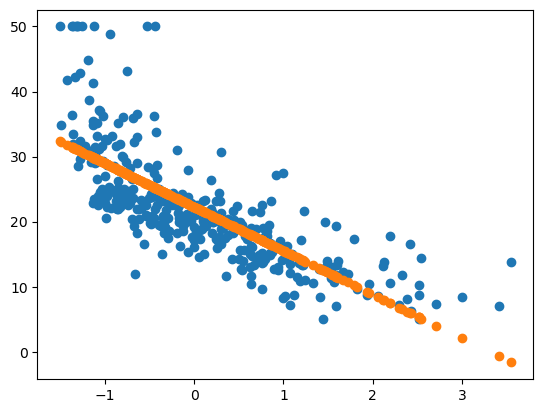

In [18]:
plt.scatter(X_pd['LSTAT'],y_train)
plt.scatter(X_pd['LSTAT'],y_pred)
plt.show()

#### 다항 회귀 구현!
1. 특성확장을 통해 다항식을 만들어 줌
2. sklean에서 PolynomialFeature 사용

In [19]:
# 특성확장
X_pd['LSTAT*LSTAT'] = X_pd['LSTAT'] **2

In [20]:
linear2 = LinearRegression()
linear2.fit(X_pd[['LSTAT','LSTAT*LSTAT']],y_train)
y_pred = linear2.predict(X_pd[['LSTAT','LSTAT*LSTAT']])

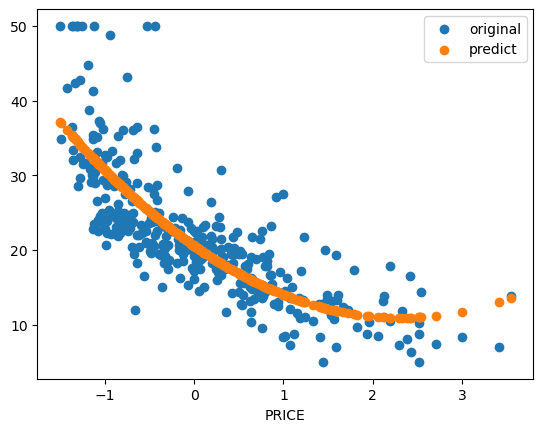

In [22]:
plt.scatter(X_pd['LSTAT'],y_train,label="original")
plt.scatter(X_pd['LSTAT'],y_pred,label="predict")

plt.legend()
plt.xlabel("LSTAT")
plt.xlabel("PRICE")

plt.show()

#### PolynamialFeatures(다항변형기) 활용!
- 다항회귀로 구현된 모델과 그렇지 않은 모델의 성능 비교!

In [ ]:
X_pd.drop("LSTAT*LSTAT",axis=1,inplace=True)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_pd,y_train)
y_pred = lr_model.predict(X_test)


#### 회귀 평가 지표
- MSE(Mean Squared Error, 평균 제곱 오차) : 큰 오차에 더 큰 패털티(숫자값)을 부여함(0~1 사이의 경우, 큰 오차에 대해 더 작은 패널티를 부여함)
- MAE(Mean Absolute Error, 평균 절대 오차) : 오차에 대한 패털티(숫자값)이 선형적으로 부여됨
- RMSE(Root MSE, 평균 제곱근 오차) : MSE에서의 오차의 단위가 원래 단위로 돌아옴
- R2score(R-squred,결정계수) : 모델이 데이터의 분산(변동)을 얼마나 잘 이해하고 있는가를 나타내는 지표
    - 0~1, 1에 가까울수록 모델이 데이터를 잘 이해하고 있다.
    - 데이터의 스케일에 영향을 받지 않음.

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred) #MSE

In [ ]:
mean_absolute_error(y_test,y_pred) #MAE

In [ ]:
mean_squared_error(y_test,y_pred)**0.5 #RMSE

In [ ]:
r2_score(y_test,y_pred) #R2 score

In [ ]:
# 다항변형기 불러오기
from sklearn.preprocessing import PolynomialFeatures

#### 규제(Regularzation)
- L1 규제 : Lasso
    - 모든 w에 똑같은 힘드로 규제를 적용함으로써 특정계수들은 0으로 표시됨
    - 특성선택(feature selection)이 이루어진다.
- L2 규제 : Ridge
    - 모든 w에 적절히 규제를 적용하는 방법으로써, 0에 가깝게 만듬